In [238]:
import pandas as pd
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [239]:
# import data 
zipcode = pd.read_csv('zip_lookup.csv')

caozone2015 = pd.read_csv(
    'CA_ozone 2015.csv', 
    index_col='Date',
    parse_dates=["Date"]
)

caozone2016 = pd.read_csv(
    'CA_ozone 2016.csv',
    index_col='Date',
    parse_dates=['Date'])

caozone2017 = pd.read_csv(
    'CA_ozone 2017.csv',
    index_col='Date',
    parse_dates=['Date'])

caozone2018 = pd.read_csv(
    'CA_ozone 2018.csv',
    index_col='Date',
    parse_dates=['Date'])

In [240]:
caozone2015['Daily Max 8-hour Ozone Concentration'].describe()  #no negative value for ozone concentration in 2015
caozone2016['Daily Max 8-hour Ozone Concentration'].describe()  #no negative value for ozone concentration in 2016
caozone2017['Daily Max 8-hour Ozone Concentration'].describe()  #no negative value for ozone concentration in 2017
caozone2018['Daily Max 8-hour Ozone Concentration'].describe()  #no negative value for ozone concentration in 2018

count    60087.000000
mean         0.043662
std          0.014944
min          0.000000
25%          0.034000
50%          0.042000
75%          0.052000
max          0.125000
Name: Daily Max 8-hour Ozone Concentration, dtype: float64

In [244]:
# merge 2015-2018 dataset
frames = [caozone2015, caozone2016, caozone2017, caozone2018]
caozone = pd.concat(frames)
caozone # 240382 rows × 19 columns
# select six counties we want
ozonecounty = caozone.loc[caozone.COUNTY.isin(['Los Angeles', 'Orange', 'Ventura', 'San Bernardino', 'Riverside', 'San Diego'])].sort_index()
ozonecounty  # 77493 rows × 19 columns
# test code: ozonecounty.loc[ozonecounty.COUNTY == 'Los Angeles'].sort_index()
# assign zip code to monitor site in those six counties for each year of ozone df
result = pd.merge(ozonecounty.reset_index(), zipcode, on=['SITE_LATITUDE', 'SITE_LONGITUDE'], how='left').set_index('Date')
# save to a new file
result.to_csv('ozonebyzip.csv')
# mean daily max 8-hour ozone concentration by year and month
result.groupby(by=[result.index.year, result.index.month])['Daily Max 8-hour Ozone Concentration'].mean()

Date  Date
2015  1       0.030687
      2       0.042249
      3       0.050385
      4       0.057190
      5       0.053079
      6       0.058274
      7       0.047652
      8       0.055822
      9       0.052731
      10      0.046421
      11      0.040369
      12      0.033268
2016  1       0.033414
      2       0.045305
      3       0.048170
      4       0.052292
      5       0.049294
      6       0.059537
      7       0.059266
      8       0.057968
      9       0.050476
      10      0.043923
      11      0.041279
      12      0.032802
2017  1       0.036221
      2       0.037723
      3       0.049020
      4       0.055973
      5       0.055281
      6       0.060909
      7       0.060328
      8       0.059254
      9       0.053345
      10      0.053597
      11      0.037766
      12      0.036189
2018  1       0.033920
      2       0.044804
      3       0.043811
      4       0.055454
      5       0.052674
      6       0.060314
      7       0.058374


Text(0, 0.5, 'Ozone (ppm)')

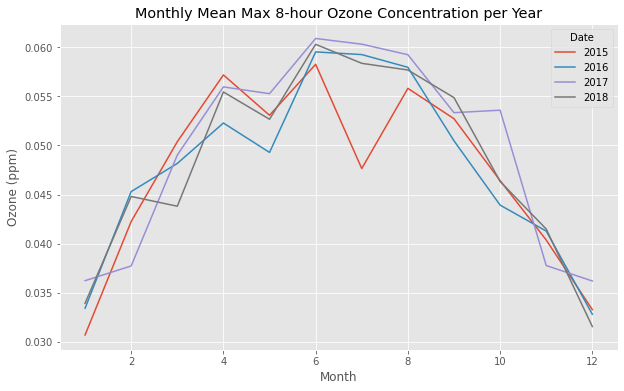

In [245]:
plt1 = pd.pivot_table(result, index=result.index.month, columns=result.index.year,
                     values='Daily Max 8-hour Ozone Concentration', aggfunc='mean').plot()

plt1.set_title("Monthly Mean Max 8-hour Ozone Concentration per Year")
plt1.set_xlabel('Month')
plt1.set_ylabel('Ozone (ppm)')

In [246]:
# all data by zip, every site mean value per year
zipozonecounty = result.groupby([result.index.year, "COUNTY", 'Site ID', 'Site Name', 'zip'])
pd.set_option('display.max_rows', None)
zipozonecounty['Daily Max 8-hour Ozone Concentration'].mean()


Date  COUNTY          Site ID   Site Name                                   zip       
2015  Los Angeles     60370002  Azusa                                       91702         0.046809
                      60370016  Glendora                                    91741         0.050155
                      60370113  West Los Angeles                            90073         0.043729
                      60371103  Los Angeles-North Main Street               90012         0.043310
                      60371201  Reseda                                      91335         0.050429
                      60371302  Compton                                     90221         0.040904
                      60371602  Pico Rivera #2                              90660         0.044449
                      60371701  Pomona                                      91767         0.049630
                      60372005  Pasadena                                    91106         0.045388
                      

In [262]:
result.head()
new = result[['Daily Max 8-hour Ozone Concentration', 'zip']]
new.head()
new.groupby(by=[new.index.year, new.index.month, 'zip'])['Daily Max 8-hour Ozone Concentration'].mean()

Date  Date  zip       
2015  1     00000         0.031875
            90012         0.027167
            90073         0.031063
            90221         0.021379
            90293         0.028759
            90660         0.027345
            90810         0.026000
            91106         0.025828
            91321         0.035387
            91335         0.032484
            91360         0.034333
            91702         0.026448
            91741         0.027933
            91767         0.024034
            91785-9998    0.027107
            91901         0.039968
            91910         0.029379
            92014         0.033600
            92027-2310    0.033759
            92051         0.032897
            92059         0.032321
            92071-4417    0.029300
            92113         0.028774
            92124         0.034179
            92179         0.036968
            92201         0.030633
            92220         0.036484
            92225         0.0286